# 调用手机摄像头拍摄一帧画面+OpenCV图像处理

同济子豪兄 2023-6-25

## 导入工具包

In [178]:
import cv2
from cvs import *

import matplotlib.pyplot as plt
%matplotlib inline

## 初始化摄像头

In [179]:
# 摄像头ID 0-后置 1-前置
Camera_ID = 0

In [ ]:
cap = cvs.VideoCapture(Camera_ID)

## 调用手机摄像头拍摄一帧画面

In [181]:
img_bgr = cap.read()

In [182]:
img_bgr.shape

(640, 480, 3)

In [183]:
# 在手机屏幕上显示画面
cvs.imshow(img_bgr)

remi.server.ws   INFO     connection established: ('127.0.0.1', 36362)
remi.server.ws   INFO     handshake complete


remi.server.ws   ERROR    Error managing incoming websocket message
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 175, in read_next_message
    self.on_message(from_websocket(decoded))
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 245, in on_message
    self.send_message(_MSG_ACK)
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 209, in send_message
    self.request.sendall(out)
BrokenPipeError: [Errno 32] Broken pipe
remi.request     ERROR    sending websocket spontaneous message
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 497, in _send_spontaneous_websocket_message
    if ws.send_message(message):
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 209, in send_message
    self.request.sendall(out)
BrokenPipeError: [Errno 32] Broken pipe
remi.server.ws   INFO     connection established: ('127.0.0.1', 36462)
r

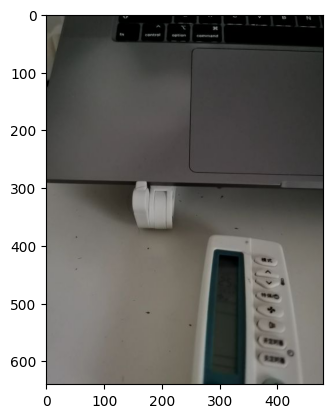

In [184]:
# 在单元格里显示画面
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## OpenCV图像处理-Canny边缘检测

- 拍摄一帧画面

In [228]:
img_bgr = cap.read()

- Canny边缘检测

In [229]:
img_bgr = cv2.Canny(img_bgr, 100, 200)
img_bgr = np.dstack((img_bgr, img_bgr, img_bgr))

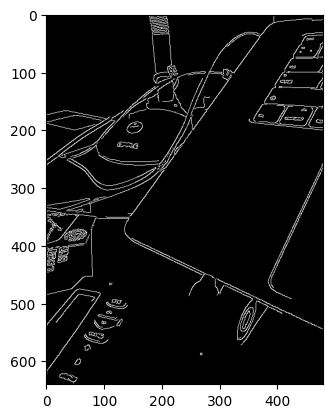

In [230]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

- 在手机屏幕上显示

In [231]:
cvs.imshow(edges)

## OpenCV图像处理-霍夫直线检测

- 拍摄一帧画面

In [220]:
img_bgr = cap.read()

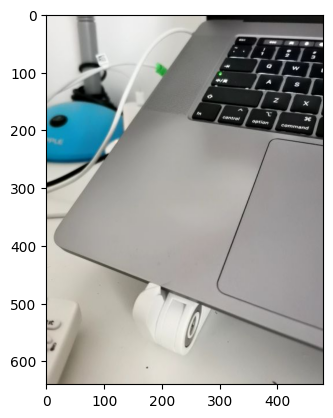

In [221]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

- 霍夫直线检测

In [222]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # BGR 转 灰度图
edges = cv2.Canny(img_gray, 50, 150, apertureSize=3) # Canny 直线检测
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)   # 霍夫直线检测

- 检测出的直线

In [223]:
lines

array([[[2.2700000e+02, 6.1086524e-01]],

       [[3.6800000e+02, 1.9373155e+00]],

       [[4.3900000e+02, 3.4906584e-01]],

       [[3.7400000e+02, 1.9373155e+00]],

       [[4.4000000e+02, 3.6651915e-01]],

       [[1.4400000e+02, 1.7104226e+00]],

       [[1.4800000e+02, 1.7104226e+00]]], dtype=float32)

- 可视化检测出的直线

In [224]:
if lines is None: # 如果检测出直线
    pass
else:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
        img_bgr = cv2.line(img_bgr, (x1, y1), (x2, y2), (0, 0, 255), 2)

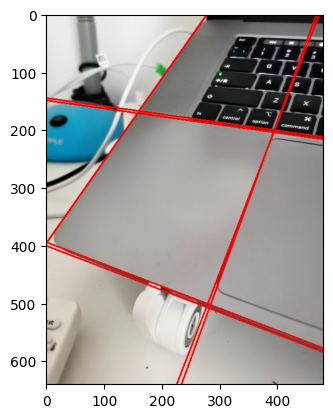

In [225]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

- 在手机屏幕上显示

In [227]:
cvs.imshow(img_bgr)